In [1]:
# import os
# import argparse
# import datetime
# import platform
# import random as rn
# import numpy as np
# import tensorflow as tf
# import sys
# sys.path.append('/home/ltetrel/DeepNeuroAN/deepneuroan/')
# sys.path.append('/home/ltetrel/DeepNeuroAN/')

# from data_generator import DataGenerator
# import models
# import metrics

# print(tf.__version__)
# print(tf.config.list_physical_devices('GPU'))

In [2]:
# class Training:
#     def __init__(self
#                  , data_dir=None
#                  , ckpt_dir=None
#                  , model_path=None
#                  , output_model_path=None
#                  , model_name="rigid_concatenated"
#                  , weights_dir=None
#                  , seed=None
#                  , epochs=50
#                  , batch_size=8
#                  , kernel_size=[3, 3, 3]
#                  , pool_size=[2, 2, 2]
#                  , dilation=[1, 1, 1]
#                  , strides=[2, 2, 2]
#                  , activation="relu"
#                  , padding="VALID"
#                  , no_batch_norm=False
#                  , preproc_layers=0
#                  , motion_correction = False
#                  , unsupervised = False
#                  , dropout=0
#                  , growth_rate=2
#                  , filters=4
#                  , units=1024
#                  , encode_layers=7
#                  , regression_layers=4
#                  , lr=1e-4
#                  , gpu=-1
#                  , ncpu=-1):
#         self._model_path = model_path
#         self._model_name = model_name
#         self._weights_dir = weights_dir
#         self._epochs = epochs
#         self._kernel_size = tuple(kernel_size)
#         self._pool_size = tuple(pool_size)
#         self._dilation = tuple(dilation)
#         self._strides = tuple(strides)
#         self._batch_size = int(batch_size)
#         self._activation = activation
#         self._padding = padding
#         self._batch_norm = not no_batch_norm
#         self._preproc_layers = preproc_layers
#         self._use_template = not motion_correction
#         self._unsupervised = unsupervised
#         self._dropout = float(dropout)
#         self._growth_rate = float(growth_rate)
#         self._filters = int(filters)
#         self._units = int(units)
#         self._encode_layers = int(encode_layers)
#         self._regression_layers = int(regression_layers)
#         self._lr = lr
#         self._gpu = gpu
#         self._ncpu = ncpu

#         self._data_dir = None
#         self._ckpt_dir = None
#         self._ckpt_path = None
#         self._output_model_path = None
#         self._list_files = None
#         self._seed = None

#         self._set_data_dir(data_dir)
#         self._set_seed(seed)
#         self._set_list_files()
#         self._set_ckpt_dir(ckpt_dir)
#         self._set_output_model_path(output_model_path)
#         self._set_ncpu()

#         self.train_gen = None
#         self.valid_gen = None
#         self.test_gen = None

#     def __repr__(self):
#         return str(__file__) \
#                + "\n" + str(datetime.datetime.now()) \
#                + "\n" + str(platform.platform()) \
#                + "\n" + "class Training()" \
#                + "\n\t input data dir : %s" % self._data_dir \
#                + "\n\t checkpoint dir : %s" % self._ckpt_dir \
#                + "\n\t model name : %s" % self._model_name \
#                + "\n\t weights dir : %s" % self._weights_dir \
#                + "\n\t seed : %s" % self._seed \
#                + "\n\t number of epochs : %s" % (self._epochs,) \
#                + "\n\t batch size : %s" % self._batch_size \
#                + "\n\t kernel size : %s" % (self._kernel_size,) \
#                + "\n\t pool size : %s" % (self._pool_size,) \
#                + "\n\t dilation rate : %s" % (self._dilation,) \
#                + "\n\t strides : %s" % (self._strides,) \
#                + "\n\t padding : %s" % self._padding \
#                + "\n\t activation : %s" % self._activation \
#                + "\n\t batch norm : %s" % self._batch_norm \
#                + "\n\t preprocessing (gaussian) layers : %s" % self._preproc_layers \
#                + "\n\t motion correction : %s" % (not self._use_template) \
#                + "\n\t unsupervised learning : %s" % (self._unsupervised) \
#                + "\n\t dropout : %f" % self._dropout \
#                + "\n\t growth rate : %d" % self._growth_rate \
#                + "\n\t filters : %d" % self._filters \
#                + "\n\t units : %d" % self._units \
#                + "\n\t number of encoding layer : %d" % self._encode_layers \
#                + "\n\t number of regression layer : %d" % self._regression_layers \
#                + "\n\t learning rate : %f" % self._lr \
#                + "\n\t number of cpus : %d" % self._ncpu \
#                + "\n\t gpu : %d" % self._gpu

#     def _set_data_dir(self, data_dir=None):
#         if data_dir is None:
#             self._data_dir = os.getcwd()
#         else:
#             self._data_dir = data_dir

#     def _set_ckpt_dir(self, ckpt_dir=None):
#         if (ckpt_dir is None) & (self._data_dir is not None):
#             self._ckpt_dir = os.path.join(self._data_dir, "../", "checkpoints")
#         else:
#             self._ckpt_dir = ckpt_dir
#         self._ckpt_path = os.path.join(self._ckpt_dir, "%s" % self._model_name, "%s_cp-{epoch:04d}.ckpt" % self._model_name)

#     def _set_ncpu(self):
#         ncpu = self._ncpu
#         if ncpu < 0:
#             ncpu = os.cpu_count()
#         elif ncpu == 0:
#             ncpu = 1
#         self._ncpu = ncpu

#     def _set_output_model_path(self, output_model_path=None):
#         if (output_model_path is None) & (self._data_dir is not None):
#             self._output_model_path = os.path.join(
#                 self._data_dir, "../", "%s_{end_time:s}" % self._model_name)
#         else:
#             self._output_model_path = output_model_path

#     def _set_seed(self, seed=None):
#         if seed is not None:
#             self._seed = int(seed)

#     def _set_list_files(self):
#         self._list_files = []
#         list_files_tmp = set([])
#         for root, _, files in os.walk(self._data_dir):
#             for file in files:
#                 filepath = os.path.join(root, file).split('.')[0]
#                 if os.path.exists(filepath + ".txt"):
#                     list_files_tmp.add(filepath)
#         self._list_files = list(list_files_tmp)
#         self._list_files.sort()

#     def _build_model(self):
#         if self._model_path is not None:
#             if self._model_path.split(".")[-1] == "json":
#                 with open(self._model_path, "r") as json_file:
#                     model = tf.keras.models.model_from_json(json_file.read(), custom_objects={'ChannelwiseConv3D': models.ChannelwiseConv3D})
#             elif self._model_path.split(".")[-1] == "h5":
#                 model = tf.keras.models.load_model(self._model_path, custom_objects={'ChannelwiseConv3D': models.ChannelwiseConv3D})
#             else:
#                 print("Warning: incompatible input model type (is not .json nor .h5)")
#         else:
#             params_model = dict(kernel_size=self._kernel_size
#                             , pool_size=self._pool_size
#                             , dilation=self._dilation
#                             , strides=self._strides
#                             , activation=self._activation
#                             , padding=self._padding
#                             , batch_norm=self._batch_norm
#                             , preproc_layers=self._preproc_layers
#                             , dropout=self._dropout
#                             , seed=self._seed
#                             , growth_rate=self._growth_rate
#                             , filters=self._filters
#                             , units=self._units
#                             , n_encode_layers=self._encode_layers
#                             , n_regression_layers=self._regression_layers)
#             if self._unsupervised:
#                 model = models.unsupervised_rigid_concatenated(**params_model)
#             else:
#                 model = models.rigid_concatenated(**params_model)
#         return model

#     def _load_weights(self, model):
#         if self._weights_dir is not None:
#             latest_checkpoint = tf.train.latest_checkpoint(self._weights_dir)
#             model.load_weights(latest_checkpoint)
#         return model

#     def _build_data_generators(self):
#         #TODO: we should use it under preproc
#         template_filepath = None
#         unsupervised = False

#         # if template is undefined, target is the same volume but not moved (motion correction)
#         if self._use_template:
#             template_filepath = os.path.join(self._data_dir, "template_on_grid")
#         # if unsupervised, network output is not a transformation but target itself
#         if self._unsupervised:
#             unsupervised = True
#         params_gen = dict(list_files=self._list_files
#                           , template_file=template_filepath
#                           , is_unsupervised=unsupervised
#                           , batch_size=self._batch_size
#                           , avail_cores=self._ncpu)
#         self.train_gen = DataGenerator(partition="train", **params_gen)
#         self.valid_gen = DataGenerator(partition="valid", **params_gen)
#         self.test_gen = DataGenerator(partition="test", **params_gen)

#     def create_callbacks(self):
#         """callbacks to optimize lr, tensorboard and checkpoints"""
#         model_ckpt = tf.keras.callbacks.ModelCheckpoint(
#             self._ckpt_path, verbose=0, save_weights_only=True, save_freq="epoch")
#         # reduce_lr_logs = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-10)
#         tensorboard_dir = os.path.join(self._data_dir
#                                        , "../"
#                                        , "tensorboard_logs"
#                                        , self._model_name
#                                        , datetime.datetime.now().strftime("%Y/%m/%d/%H:%M:%S"))
#         tensorboard_logs = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_dir
#                                                           , update_freq="epoch"
#                                                           , histogram_freq=1
#                                                           , write_graph=False
#                                                           , write_images=True)
#         # train_dice_logs = DiceCallback(data_gen=self.train_gen, logs_dir=tensorboard_dir + "/train_diff")
#         # valid_dice_logs = DiceCallback(data_gen=self.valid_gen, logs_dir=tensorboard_dir + "/validation_diff")
#         return [model_ckpt, tensorboard_logs]

#     def add_custom_callbacks(self, calls, train_gen, valid_gen):
#         """custom callbacks using metrics.py"""
        

#     def run(self):

#         #configuration for cpu
#         tf.config.threading.set_inter_op_parallelism_threads(self._ncpu)
#         tf.config.threading.set_intra_op_parallelism_threads(self._ncpu)

#         #configuration for gpu
#         if self._gpu > -1:
#             os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#             os.environ["CUDA_VISIBLE_DEVICES"] = str(self._gpu)
#             # physical_devices = tf.config.experimental.list_physical_devices('GPU')
#             # tf.config.experimental.set_memory_growth(physical_devices[0], True)

#         if self._seed is not None:
#             os.environ['PYTHONHASHSEED'] = str(self._seed)
#             rn.seed(self._seed)
#             np.random.seed(self._seed)
#             tf.random.set_seed(self._seed)

#         # generator creation
#         self._build_data_generators()

#         # model building
#         model = self._build_model()
        
#         model.compile(optimizer=tf.keras.optimizers.Adam(lr=self._lr)
# #                         , loss=[metrics.dice_loss if self._unsupervised else metrics.quaternion_mse_loss]
#                         , loss=["mae"])

#         #by default, if weights_dir is given, the model use them
#         model = self._load_weights(model)
#         model.summary(positions=[.30, .65, .80, 1.])
#         # model.summary(positions=[.30, .70, 1.])
#         # tf.keras.utils.plot_model(model, show_shapes=True, to_file=os.path.join(self._data_dir, "../", "model.png")
#         calls = self.create_callbacks()
#         calls[-1].set_model(model)

#         #################### TMP
#         inputs = tf.random.uniform((4, 220, 220, 220, 2))
#         targets = tf.random.uniform((4, 220, 220, 220, 1))
#         learning_rate = 1e-3
        
#         print("### BEFORE WALKING DOWN GRADIENT ###")
#         print("outputs:\n", np.mean(model(inputs)))
#         print("targets:\n", np.mean(targets))

#         steps = 25  # steps of gradient descent
#         for s in range(steps):

#             # ===== Numerical gradient =====
#             with tf.GradientTape() as t:
#                 current_loss = tf.keras.losses.MAE(targets, model(inputs))
# #                 current_loss = metrics.dice_loss(targets, model(inputs))
                
#             evaluated_gradients = t.gradient(current_loss, model.trainable_weights, unconnected_gradients=tf.UnconnectedGradients.NONE)
#             print(evaluated_gradients)
#             # Step down the gradient for each layer
#             for i in range(len(model.trainable_weights)):
#                 model.trainable_weights[i].assign_sub(self._lr * evaluated_gradients[i])
            
#             # Every 5 steps print the RMSE
#             if s % 5 == 0:
#                 print("### step " + str(s) + "###")
#                 for i in range(len(model.trainable_weights)):
# #                     print("weights:")
# #                     print(tf.reduce_mean(model.trainable_weights[i]))
#                     print("Layer [%d] grad:" %i)
#                     print(tf.reduce_mean(evaluated_gradients[i])) 
#                 dice = metrics.dice_loss(targets, model(inputs))
#                 print("dice:", dice)

#         print("### AFTER STEPPING DOWN GRADIENT ###")
#         print("outputs:\n", np.mean(model(inputs)))
#         print("targets:\n", np.mean(targets))
#         print("final dice:", metrics.dice_loss(targets, model(inputs)))

In [3]:
# train = Training(batch_size=16
#                  , data_dir='/DATA/derivatives/deepneuroan/training/generated_data/'
#                  , encode_layers=4
#                  , epochs=1500
#                  , filters=8
#                  , gpu=1
#                  , growth_rate=2
#                  , kernel_size=[5, 5, 5]
#                  , lr=0.5
#                  , model_name='unsupervised_kernel_5_lr_005'
#                  , ncpu=16
#                  , no_batch_norm=False
#                  , padding='SAME'
#                  , pool_size=[2, 2, 2]
#                  , preproc_layers=1
#                  , regression_layers=5
#                  , seed=0
#                  , strides=[2, 2, 2]
#                  , units=1024
#                  , unsupervised=True)
# train.run()

In [4]:
import sys
sys.path.append('/home/ltetrel/notebooks/STN.keras')
sys.path.append('/home/ltetrel/notebooks/STN.keras/src')
sys.path.append('/home/ltetrel/notebooks/STN.keras/src/models_test')

from data_manager import ClutteredMNIST
from visualizer import plot_mnist_sample
from visualizer import print_evaluation
from visualizer import plot_mnist_grid
import tensorflow as tf
import utils_test
import layers_test
import numpy as np

import os
import argparse
import datetime
import platform
import random as rn
sys.path.append('/home/ltetrel/DeepNeuroAN/deepneuroan/')
sys.path.append('/home/ltetrel/DeepNeuroAN/')

from data_generator import DataGenerator
import models
import metrics

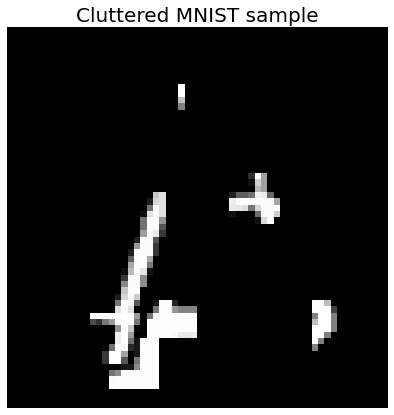

In [5]:
dataset_path = "/home/ltetrel/notebooks/STN.keras/datasets/mnist_cluttered_60x60_6distortions.npz"
batch_size = 256
num_epochs = 30

data_manager = ClutteredMNIST(dataset_path)
train_data, val_data, test_data = data_manager.load()
x_train, y_train = train_data
plot_mnist_sample(x_train[7])

In [6]:
def STN(input_shape=(60, 60, 1), sampling_size=(30, 30), num_classes=10):
    image = tf.keras.layers.Input(shape=input_shape)
    locnet = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(image)
    locnet = tf.keras.layers.Conv2D(20, (5, 5), padding='SAME')(locnet)
    locnet = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(locnet)
    locnet = tf.keras.layers.Conv2D(20, (5, 5), padding='SAME')(locnet)
    locnet = tf.keras.layers.Flatten()(locnet)
    locnet = tf.keras.layers.Dense(50)(locnet)
    locnet = tf.keras.layers.Activation('relu')(locnet)
    weights = utils_test.get_initial_weights(50)
    locnet = tf.keras.layers.Dense(6, weights=weights)(locnet)
    x = layers_test.BilinearInterpolation(sampling_size)([image, locnet])
    tf.print(x.shape)
    x = x[:, :, :, 0]
    x = tf.expand_dims(x, axis=-1)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='SAME')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(x)
    x = tf.keras.layers.Conv2D(32, (3, 3), padding='SAME')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding='SAME')(x)
    x = tf.keras.layers.Flatten()(x)
    tf.print(x.shape)
    x = tf.keras.layers.Dense(256)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Dense(num_classes)(x)
    x = tf.keras.layers.Activation('softmax')(x)
    return tf.keras.models.Model(inputs=image, outputs=x)

model = STN()
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

inputs = tf.random.uniform((4, 60, 60, 1))
targets = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
           , [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
           , [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
           , [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
learning_rate = 1e-3

print("### BEFORE WALKING DOWN GRADIENT ###")
print("outputs:\n", model(inputs))
print("targets:\n", targets)

steps = 100  # steps of gradient descent
for s in range(steps):

    # ===== Numerical gradient =====
    with tf.GradientTape() as t:
        current_loss = tf.keras.losses.categorical_crossentropy(targets, model(inputs))
#                 current_loss = metrics.dice_loss(targets, model(inputs))

    evaluated_gradients = t.gradient(current_loss, model.trainable_weights, unconnected_gradients=tf.UnconnectedGradients.NONE)
    # Step down the gradient for each layer
    for i in range(len(model.trainable_weights)):
        model.trainable_weights[i].assign_sub(1e-3 * evaluated_gradients[i])

    # Every 5 steps print the RMSE
    if s % 10 == 0:
        print("### step " + str(s) + "###")
#         for i in range(len(model.trainable_weights)):
#                     print("weights:")
#                     print(tf.reduce_mean(model.trainable_weights[i]))
#             print("Layer [%d] grad:" %i)
#             print(tf.reduce_mean(evaluated_gradients[i])) 
        dice = tf.keras.losses.categorical_crossentropy(targets, model(inputs))
        print("dice:", dice)

print("### AFTER STEPPING DOWN GRADIENT ###")
print("outputs:\n", model(inputs))
print("targets:\n", targets)
print("final dice:", tf.keras.losses.categorical_crossentropy(targets, model(inputs)))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
TensorShape([None, None, None, 2])


ValueError: The last dimension of the inputs to `Dense` should be defined. Found `None`.

In [ ]:
# def STN(input_shape=(60, 60, 60, 1), sampling_size=(30, 30, 30), num_classes=10):
#     image = tf.keras.layers.Input(shape=input_shape)
#     locnet = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), padding='SAME')(image)
#     locnet = tf.keras.layers.Conv3D(20, (5, 5, 5), padding='SAME')(locnet)
#     locnet = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), padding='SAME')(locnet)
#     locnet = tf.keras.layers.Conv3D(20, (5, 5, 5), padding='SAME')(locnet)
#     locnet = tf.keras.layers.Flatten()(locnet)
#     locnet = tf.keras.layers.Dense(50)(locnet)
#     locnet = tf.keras.layers.Activation('relu')(locnet)
#     weights = utils_test.get_initial_weights_3D(50)
#     locnet = tf.keras.layers.Dense(7, weights=weights)(locnet)
#     x = models.LinearTransformation(sampling_size)([image, locnet])
#     x = tf.keras.layers.Conv3D(32, (3, 3, 3), padding='SAME')(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), padding='SAME')(x)
#     x = tf.keras.layers.Conv3D(32, (3, 3, 3), padding='SAME')(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.MaxPool3D(pool_size=(2, 2, 2), padding='SAME')(x)
#     x = tf.keras.layers.Flatten()(x)
#     x = tf.keras.layers.Dense(256)(x)
#     x = tf.keras.layers.Activation('relu')(x)
#     x = tf.keras.layers.Dense(num_classes)(x)
#     x = tf.keras.layers.Activation('softmax')(x)
#     return tf.keras.models.Model(inputs=image, outputs=x)

# model = STN()
# model.compile(loss='categorical_crossentropy', optimizer='adam')
# model.summary()

# inputs = tf.random.uniform((4, 60, 60, 60, 1))
# targets = [[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#            , [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
#            , [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#            , [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
# learning_rate = 1e-3

# print("### BEFORE WALKING DOWN GRADIENT ###")
# print("outputs:\n", model(inputs))
# print("targets:\n", targets)

# steps = 25  # steps of gradient descent
# for s in range(steps):

#     # ===== Numerical gradient =====
#     with tf.GradientTape() as t:
#         current_loss = tf.keras.losses.categorical_crossentropy(targets, model(inputs))
# #                 current_loss = metrics.dice_loss(targets, model(inputs))

#     evaluated_gradients = t.gradient(current_loss, model.trainable_weights, unconnected_gradients=tf.UnconnectedGradients.NONE)

#     # Every 5 steps print the RMSE
#     print("### step " + str(s) + "###")
#     for i in range(len(model.trainable_weights)):
# #                     print("weights:")
# #                     print(tf.reduce_mean(model.trainable_weights[i]))
#         print("Layer [%d] grad:" %i)
# #             print(tf.shape(evaluated_gradients[i]))
#         print(evaluated_gradients[i]) 
# #         print(tf.reduce_mean(evaluated_gradients[i])) 
#     dice = tf.keras.losses.categorical_crossentropy(targets, model(inputs))
#     print("dice:", dice)
    
#         # Step down the gradient for each layer
#     for i in range(len(model.trainable_weights)):
#         model.trainable_weights[i].assign_sub(1e-3 * evaluated_gradients[i])

# print("### AFTER STEPPING DOWN GRADIENT ###")
# print("outputs:\n", model(inputs))
# print("targets:\n", targets)
# print("final dice:", tf.keras.losses.categorical_crossentropy(targets, model(inputs)))